# Major Assignment – 2 (Chapter 3 – 4)

## Part B – Lab Questions

In [5]:
"""Q1. An automobile company wants to predict a car’s mpg value from its physical attributes.
Tasks:
(a) Load the dataset auto_mpg.csv and remove missing values.
(b) Identify predictor and target variables.
(c) Perform data splitting (80% train, 20% test).
(d) Fit a Linear Regression model and predict test outcomes.
(e) Evaluate the model using Mean Squared Error and R² score.
(f) Discuss: If the R² score = 0.85, what does it imply about model performance?"""
# (a)
import pandas as pd
df = pd.read_csv("auto_mpg.csv") 
df = df.dropna ()
df = df.drop(columns=["car_name"])
# (b)
X = df.drop("mpg", axis=1)
y = df ["mpg"]
# (c)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X, y, test_size=0.2, random_state=42)
# (d)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train) 
y_pred=model.predict(X_test)
# (e)
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, y_pred)
r2=r2_score (y_test, y_pred)
print("MSE=", mse)
print("R2=", r2)

MSE= 10.710864418838371
R2= 0.790150038676035


In [1]:
"""Q2. Exploring random sampling methods to estimate model uncertainty.
Tasks:
(a) From the btissue.csv data, extract only the feature columns (excluding labels).
(b) Using the resample() method, create a bootstrap sample of 100 observations.
(c) Show the first 10 rows of the sample and identify if any rows are repeated."""
# (a)
import pandas as pd
from sklearn.utils import resample
df = pd.read_csv("btissue.csv") 
X = df.drop(columns=["class"])
# (b)
boot=resample (X, n_samples=100, replace=True, random_state=42)
# (c)
print(boot.head (10))
print(boot.duplicated().any())

              I0     PA500       HFS           DA           Area        A/DA  \
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
51    274.993396  0.147131  0.137532    66.457943    1217.415651   18.318588   
92   1800.000000  0.091979  0.205251   362.863321   15021.553890   41.397278   
14    485.668806  0.230209  0.134041   253.893699    8135.968359   32.044783   
71   1385.664721  0.092328  0.089361   202.480044    8785.028733   43.387134   
60    197.000000  0.132645  0.074002    33.460653     409.647141   12.242652   
20    500.000000  0.192684  0.194779   144.688578    3055.012963   21.114403   
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
82   1647.939811  0.080983  0.086568   576.770376   11852.485060   20.549747   
86   2100.000000  0.121649  0.377689   450.551667   35671.606290   79.173176   

         Max IP          DR            P  
102  418.687286  977.552367  2664.583623  
51    40.849678   52.421008   327

In [4]:
"""Q3. Instead of relying on a single train–test split, you want to check how consistent your
model is.
Tasks:
(a) Using the btissue.csv dataset, implement 5-fold cross-validation.
(b) For each fold, print the train/test indices and record how many samples are used for
training vs testing.
(c) Visualize or summarize how different folds cover the entire dataset without overlap."""

import pandas as pd
from sklearn.model_selection import KFold 
import numpy as np
df = pd.read_csv("btissue.csv")
kf= KFold (n_splits=5, shuffle=True, random_state=42)
all_test = []
for i, (train_idx, test_idx) in enumerate(kf.split(df)):
 print("Fold", i+1)
 print("Train indices:", train_idx)
 print("Test indices:", test_idx)
 print("Train size:", len(train_idx), "Test size:", len(test_idx)) 
print()
all_test.append(test_idx)
all_test = np.concatenate(all_test)
print("Total samples:", len(df))
print("Total test indices collected across folds:", len(all_test)) 
print("Unique test indices:", len(np.unique (all_test)))

Fold 1
Train indices: [  1   2   3   5   6   7   8   9  13  14  15  16  17  19  20  21  22  23
  24  25  26  27  28  29  31  32  34  35  36  37  38  39  40  41  43  45
  46  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  66  68
  69  70  71  72  73  74  75  76  77  82  83  84  85  86  87  88  89  90
  91  92  94  95  96  98  99 101 102 103 104 105]
Test indices: [  0   4  10  11  12  18  30  33  42  44  47  55  64  65  67  78  79  80
  81  93  97 100]
Train size: 84 Test size: 22
Fold 2
Train indices: [  0   1   2   3   4   6   7   8  10  11  12  13  14  17  18  19  20  21
  23  24  25  27  29  30  32  33  34  37  38  41  42  43  44  46  47  48
  49  50  51  52  54  55  56  57  58  59  60  61  63  64  65  66  67  68
  69  70  71  72  74  75  78  79  80  81  82  83  84  85  86  87  89  90
  91  92  93  94  96  97  98  99 100 101 102 103 105]
Test indices: [  5   9  15  16  22  26  28  31  35  36  39  40  45  53  62  73  76  77
  88  95 104]
Train size: 85 Test size: 21
Fold

In [10]:
"""Q4. Testing two validation techniques to measure model generalization.
Tasks:
(a) Use the btissue.csv dataset and a Decision Tree Classifier.
(b) Evaluate model performance using:
i) Holdout (80/20 split)
ii) 5-Fold Cross-Validation
(c) Compare the accuracy results from both methods."""
# (a)
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("btissue.csv")
X = df.drop("class", axis=1)
y = df ["class"]
# (b-i) Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
holdout_acc = accuracy_score (y_test, dt.predict(X_test))
# (b-ii) 5-Fold CV
kf = KFold (n_splits=5, shuffle=True, random_state=42) 
cv_acc = cross_val_score (dt, X, y, cv=kf).mean()
# (c)
print("Holdout Accuracy:", holdout_acc)
print("5-Fold CV Accuracy:", cv_acc)

Holdout Accuracy: 0.7727272727272727
5-Fold CV Accuracy: 0.6121212121212121


                    Income_Spend_Ratio  Norm_Spending  Spending Score
Income_Spend_Ratio            1.000000      -0.646817       -0.646817
Norm_Spending                -0.646817       1.000000        1.000000
Spending Score               -0.646817       1.000000        1.000000


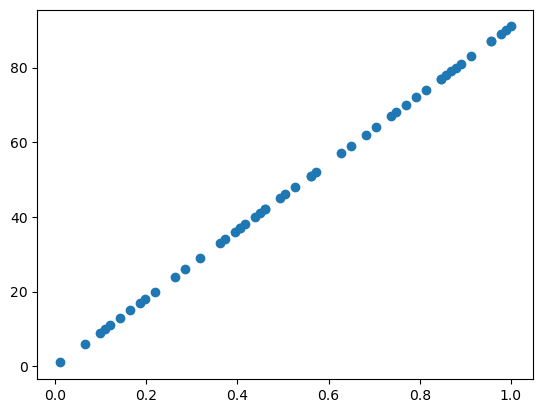

In [16]:
"""Q5. Feature Creation from Structured Data
(a) Using a dataset containing columns like Age, Income, and Spending Score, construct
new derived features such as Age Group, Income-to-Spending Ratio, and Normalized
Spending.
(b) Plot and analyze how the new features correlate with the target variable."""
# (a)
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")
df ["Age_Group"] = pd.cut (df ["Age"], bins=[0,25,45,65,120],labels=["Young", "Adult", "Middle", "Senior"])
df ["Income_Spend_Ratio"] = df ["Income"] / df ["Spending Score"]
df ["Norm_Spending"] = df ["Spending Score"] / df ["Spending Score"].max()
# (b)
print(df [["Income_Spend_Ratio", "Norm_Spending", "Spending Score"]].corr())
plt.scatter(df ["Norm_Spending"], df ["Spending Score"])
plt.show()

In [24]:
"""Q6. Load the Iris dataset and select a subset of features manually using the .iloc function.
Train a simple Decision Tree Classifier using only the selected subset of features and
compare its performance with the model trained using all features.
Tasks:
(a) Load the Iris dataset from sklearn.datasets.
(b) Create a DataFrame and display the first few rows.
(c) Train a Decision Tree Classifier using all features and record the accuracy.
(d) Select a subset of columns (for example, the first two features: sepal length and sepal
width) using .iloc."""
# (a)
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
# (b)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
print(df.head())
# (c) Decision Tree using ALL features
X = df.iloc[:, :-1]   # all 4 features
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_all = DecisionTreeClassifier()
dt_all.fit(X_train, y_train)
acc_all = accuracy_score(y_test, dt_all.predict(X_test))
# (d) Subset of first two features using .iloc
X_sub = df.iloc[:, :2]  # sepal length & sepal width
# (e) Train classifier with subset column
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sub, y, test_size=0.2, random_state=42)
dt_sub = DecisionTreeClassifier()
dt_sub.fit(X_train2, y_train2)
acc_sub = accuracy_score(y_test2, dt_sub.predict(X_test2))
# (f)
print("Accuracy with all features:", acc_all)
print("Accuracy with subset features:", acc_sub)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy with all features: 1.0
Accuracy with subset features: 0.6333333333333333


[0.92461872 0.05306648]


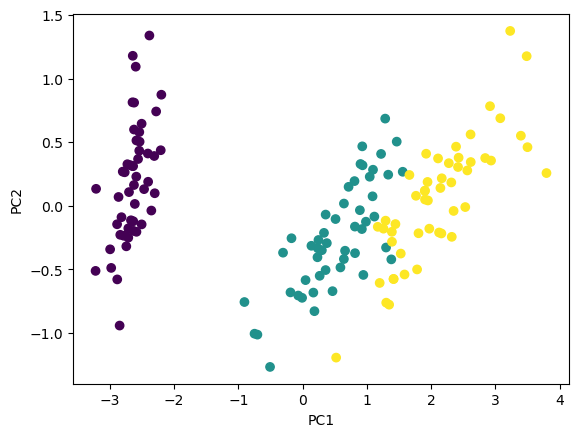

In [27]:
"""Q7. Load the Iris dataset and apply Principal Component Analysis (PCA) to reduce its four
numerical features (sepal length, sepal width, petal length, petal width) into two principal
components. Visualize the transformed data in a 2D scatter plot to observe how the classes
(Setosa, Versicolor, Virginica) are separated in the reduced feature space. Additionally,
display the explained variance ratio for each component.
Tasks:
(a) Load the Iris dataset using sklearn.datasets.
(b) Perform PCA to reduce the dataset to two components.
(c) Create a new DataFrame containing the two principal components and target labels.
(d) Plot the two components using a scatter plot with different colors for each class."""
# (a)
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 
import pandas as pd
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
# (b)
pca = PCA (n_components=2) 
X_pca = pca.fit_transform(X)
# (c)
df = pd.DataFrame(X_pca, columns=["PC1", "PC2"]) 
df ["target"] = y
print(pca.explained_variance_ratio_)
# (d)
plt.scatter(df ["PC1"], df ["PC2"], c=df["target"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [31]:
"""Q8. Create a dataset containing employee information, including Department, Job Role, and
Marital Status. Convert all categorical columns into numeric form so that the dataset can be
used effectively for training machine learning models. Use appropriate encoding techniques
such as Label Encoding and One-Hot Encoding.
Tasks:
(a) Create a DataFrame with the following columns and sample data:
Department (e.g., HR, IT, Finance)
Job_Role (e.g., Manager, Analyst, Clerk)
Marital_Status (e.g., Single, Married, Divorced)
(b) Display the original dataset.
(c) Encode categorical columns using:
Label Encoding for ordered or binary categories.
One-Hot Encoding for nominal categories."""
# (a)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame({
    "Department": ["HR", "IT", "Finance", "IT"],
    "Job_Role": ["Manager", "Analyst", "Clerk", "Manager"],
    "Marital Status": ["Single", "Married", "Divorced", "Single"]
})
# (b)
print("Original Dataset:")
print(df)
# (c) Label Encoding (for Marital Status)
le = LabelEncoder()
df["Marital Status"] = le.fit_transform(df["Marital Status"])
# One-Hot Encoding (for Department & Job_Role)
df_encoded = pd.get_dummies(df, columns=["Department", "Job_Role"])
print("\nEncoded Dataset:")
print(df_encoded)

Original Dataset:
  Department Job_Role Marital Status
0         HR  Manager         Single
1         IT  Analyst        Married
2    Finance    Clerk       Divorced
3         IT  Manager         Single

Encoded Dataset:
   Marital Status  Department_Finance  Department_HR  Department_IT  \
0               2               False           True          False   
1               1               False          False           True   
2               0                True          False          False   
3               2               False          False           True   

   Job_Role_Analyst  Job_Role_Clerk  Job_Role_Manager  
0             False           False              True  
1              True           False             False  
2             False            True             False  
3             False           False              True  
